In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import re
import pylab
%matplotlib inline
import math
import random
import scipy.stats
from sklearn import linear_model

import warnings;
warnings.filterwarnings('ignore');
sns.set(rc={'figure.figsize':(12,9)})

#### Data obtained from https://www.doe.virginia.gov/

In [2]:
schools = pd.read_csv('Datasets/' + 'schools.csv')

admin_education = pd.read_csv('Datasets/' + 'Education of GaTE Administrator - Sheet1.csv')
responsibilities_admin = pd.read_csv('Datasets/' + 'Responsibilities of GaTE Administrator - Sheet1.csv')

referred_students = pd.read_csv('Datasets/' + 'Number and Ethnicity of All Students Referred for Gifted Services during 2019-2020 School year - Sheet1.csv')
identified_students = pd.read_csv('Datasets/' + 'Ethnicity of Identified Students by Grade - Sheet1.csv')
gender = pd.read_csv('Datasets/' + 'Gender of Identified Students by Grade - Sheet1.csv')


giftedness_by_grade = pd.read_csv('Datasets/' + 'Giftedness by Grade - Sheet1.csv')

### Categories of GaTE programs offered

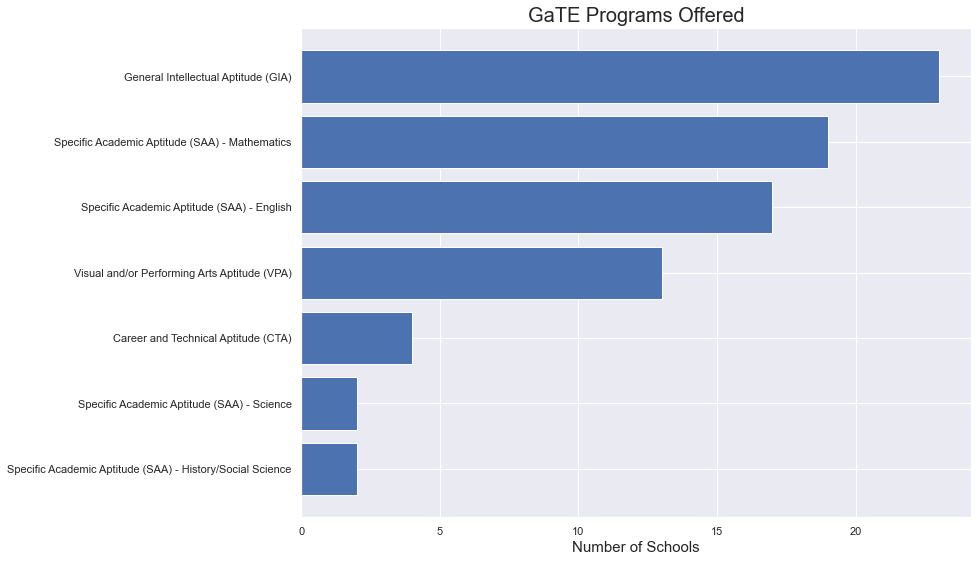

In [3]:
schools.set_index('District')
categories = list(schools.loc[:,schools.columns != 'District'])
quantity = [schools[i].sum() for i in categories]

temp_df = pd.DataFrame(quantity, categories)
temp_df.columns = ['quantity']
temp_df = temp_df.sort_values(by=['quantity'])
temp_df.head()

plt.barh(temp_df.index.values.tolist(), temp_df['quantity']);
plt.xlabel('Number of Schools', fontsize = 15);
plt.title('GaTE Programs Offered', fontsize = 20);

### Education of GaTE Instructors

In [4]:
admin_education = admin_education.set_index('Education of Administrator')

admin_education = admin_education.sort_values(by=['Quantity'])

proportion = [round((admin_education['Quantity'][i])/(admin_education['Quantity'].sum()), 2) for i in range(0, len(admin_education))]
proportion

admin_education['Proportion'] = proportion

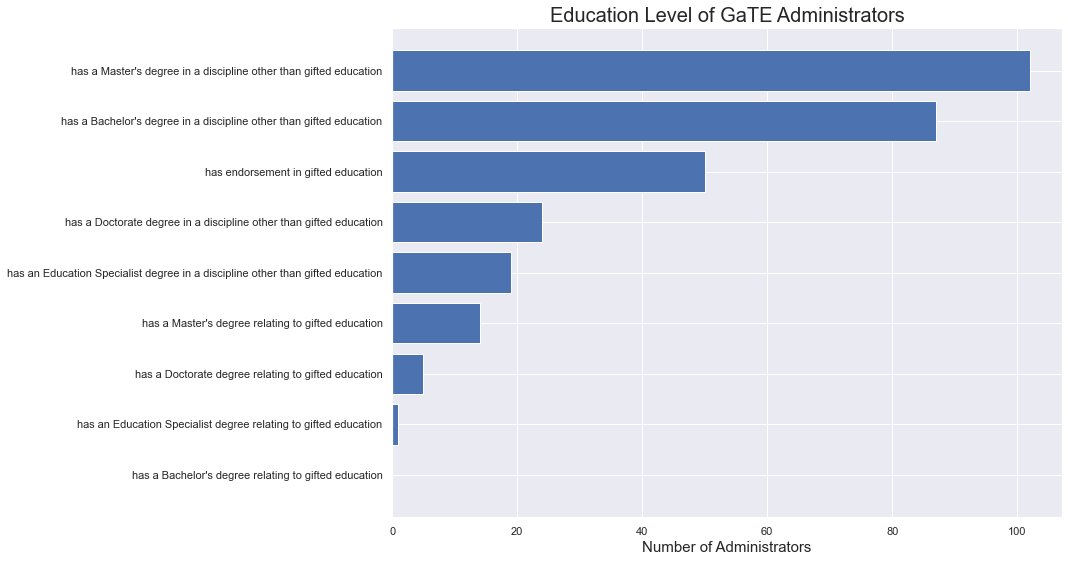

,Quantity,Proportion
Education of Administrator,,
has a Bachelor's degree relating to gifted education,0,0.00
has an Education Specialist degree relating to gifted education,1,0.00
has a Doctorate degree relating to gifted education,5,0.02
has a Master's degree relating to gifted education,14,0.05
has an Education Specialist degree in a discipline other than gifted education,19,0.06
has a Doctorate degree in a discipline other than gifted education,24,0.08
has endorsement in gifted education,50,0.17
has a Bachelor's degree in a discipline other than gifted education,87,0.29
has a Master's degree in a discipline other than gifted education,102,0.34


In [5]:
plt.barh(admin_education.index, admin_education['Quantity']);
plt.xlabel('Number of Administrators', fontsize = 15);
plt.title('Education Level of GaTE Administrators', fontsize = 20);
plt.show()

admin_education

### Number and Ethnicity of All Students Referred for Gifted Services during 2019-2020 School Year

In [6]:
referred_students = referred_students.fillna(0)
referred_students = referred_students.set_index('Grade')
referred_students

,American Indian or Alaska Native,Asian,Black,Hispanic,White,Native Hawaiian or Pacific Islander,"Non-Hispanic, two or more races"
Grade,,,,,,,
KG,10.0,617,590,826,1918,0.0,348
G1,25.0,987,1025,1231,4000,22.0,674
G2,17.0,1258,1285,1498,5216,16.0,781
G3,16.0,911,941,1098,3969,12.0,544
G4,23.0,1314,979,1067,4159,0.0,537
G5,16.0,803,910,897,3126,18.0,475
G6,0.0,321,351,311,1509,0.0,160
G7,0.0,142,231,185,951,0.0,98
G8,0.0,66,165,121,831,0.0,78


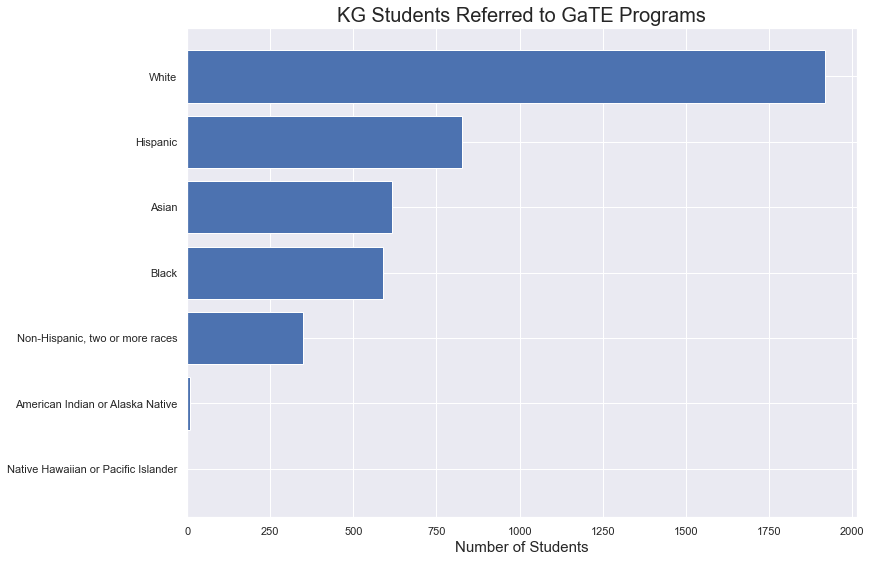

                                     Number  Proportion
Race                                                   
Native Hawaiian or Pacific Islander     0.0        0.00
American Indian or Alaska Native       10.0        0.00
Non-Hispanic, two or more races       348.0        0.08
Black                                 590.0        0.14
Asian                                 617.0        0.14
Hispanic                              826.0        0.19
White                                1918.0        0.45


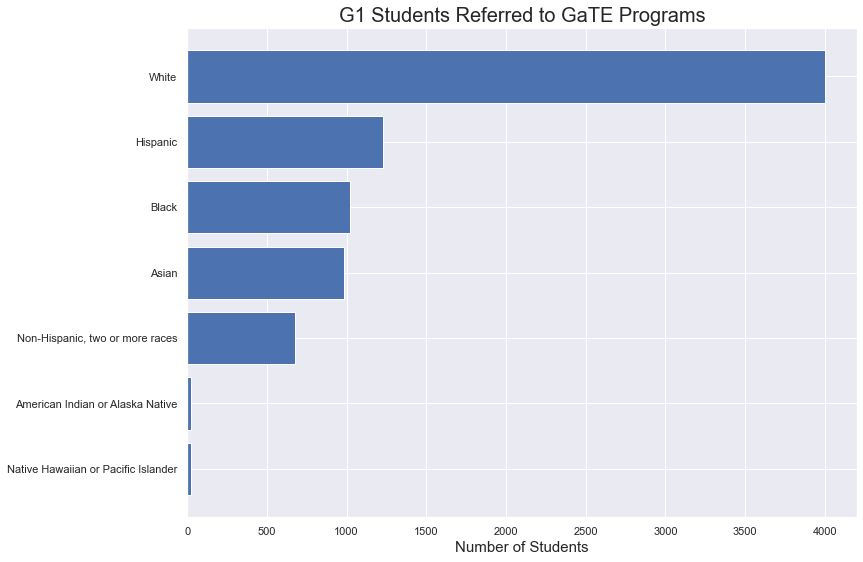

                                     Number  Proportion
Race                                                   
Native Hawaiian or Pacific Islander    22.0        0.00
American Indian or Alaska Native       25.0        0.00
Non-Hispanic, two or more races       674.0        0.08
Asian                                 987.0        0.12
Black                                1025.0        0.13
Hispanic                             1231.0        0.15
White                                4000.0        0.50


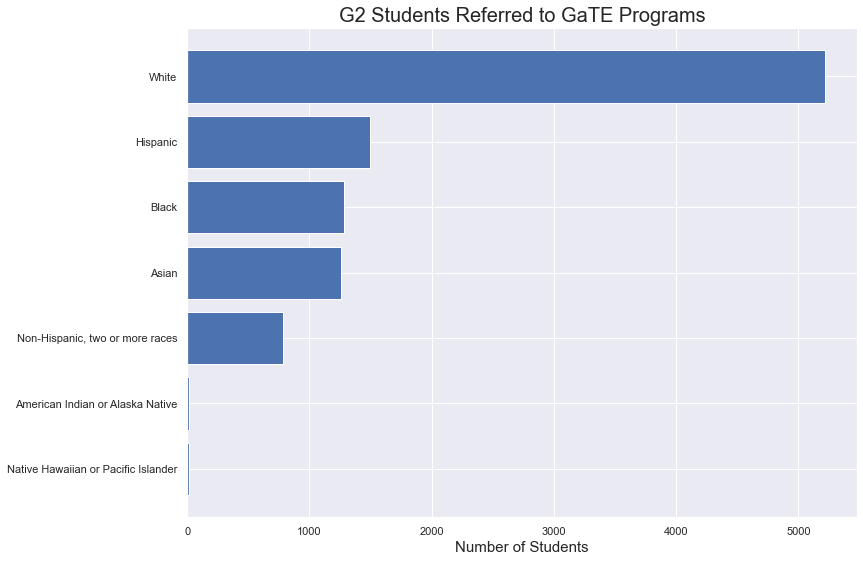

                                     Number  Proportion
Race                                                   
Native Hawaiian or Pacific Islander    16.0        0.00
American Indian or Alaska Native       17.0        0.00
Non-Hispanic, two or more races       781.0        0.08
Asian                                1258.0        0.12
Black                                1285.0        0.13
Hispanic                             1498.0        0.15
White                                5216.0        0.52


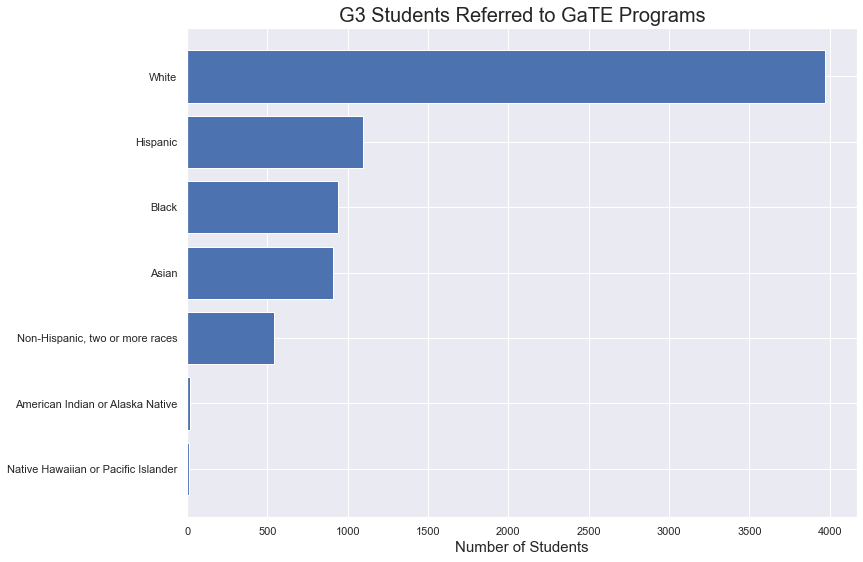

                                     Number  Proportion
Race                                                   
Native Hawaiian or Pacific Islander    12.0        0.00
American Indian or Alaska Native       16.0        0.00
Non-Hispanic, two or more races       544.0        0.07
Asian                                 911.0        0.12
Black                                 941.0        0.13
Hispanic                             1098.0        0.15
White                                3969.0        0.53


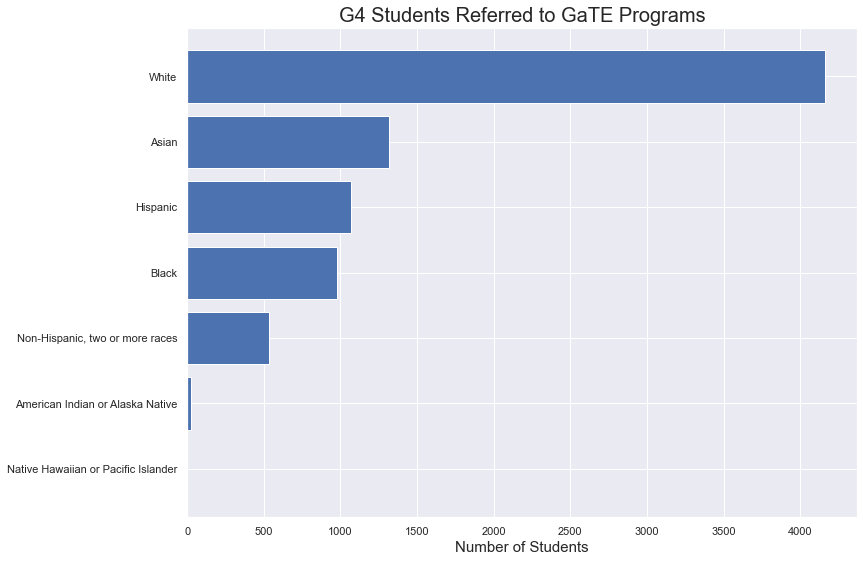

                                     Number  Proportion
Race                                                   
Native Hawaiian or Pacific Islander     0.0        0.00
American Indian or Alaska Native       23.0        0.00
Non-Hispanic, two or more races       537.0        0.07
Black                                 979.0        0.12
Hispanic                             1067.0        0.13
Asian                                1314.0        0.16
White                                4159.0        0.51


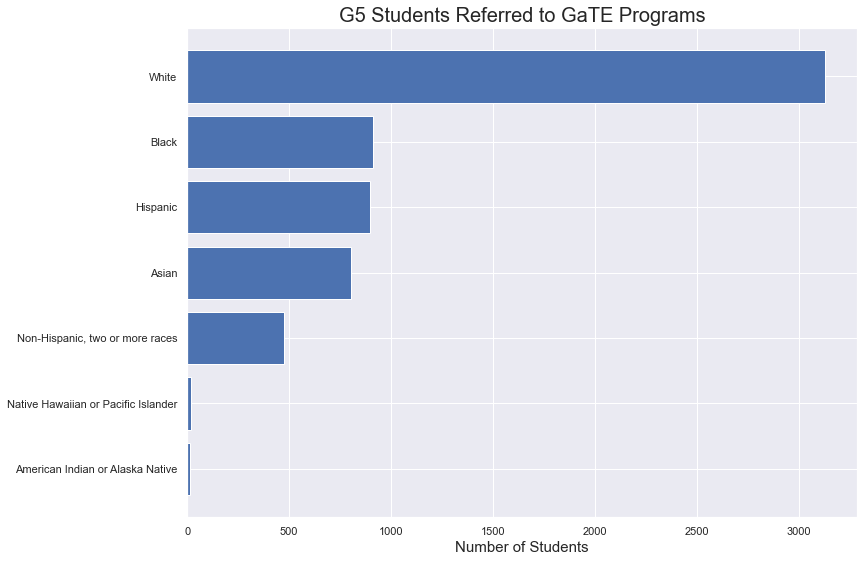

                                     Number  Proportion
Race                                                   
American Indian or Alaska Native       16.0        0.00
Native Hawaiian or Pacific Islander    18.0        0.00
Non-Hispanic, two or more races       475.0        0.08
Asian                                 803.0        0.13
Hispanic                              897.0        0.14
Black                                 910.0        0.15
White                                3126.0        0.50


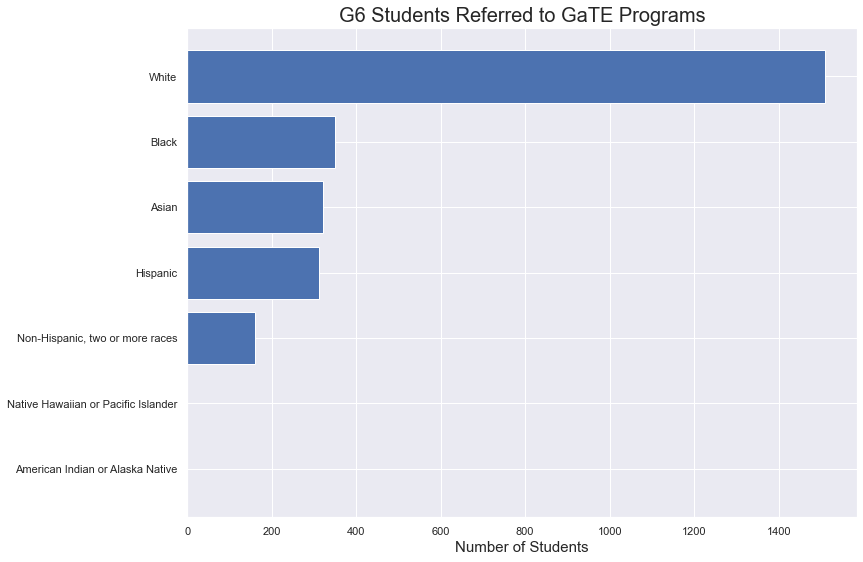

                                     Number  Proportion
Race                                                   
American Indian or Alaska Native        0.0        0.00
Native Hawaiian or Pacific Islander     0.0        0.00
Non-Hispanic, two or more races       160.0        0.06
Hispanic                              311.0        0.12
Asian                                 321.0        0.12
Black                                 351.0        0.13
White                                1509.0        0.57


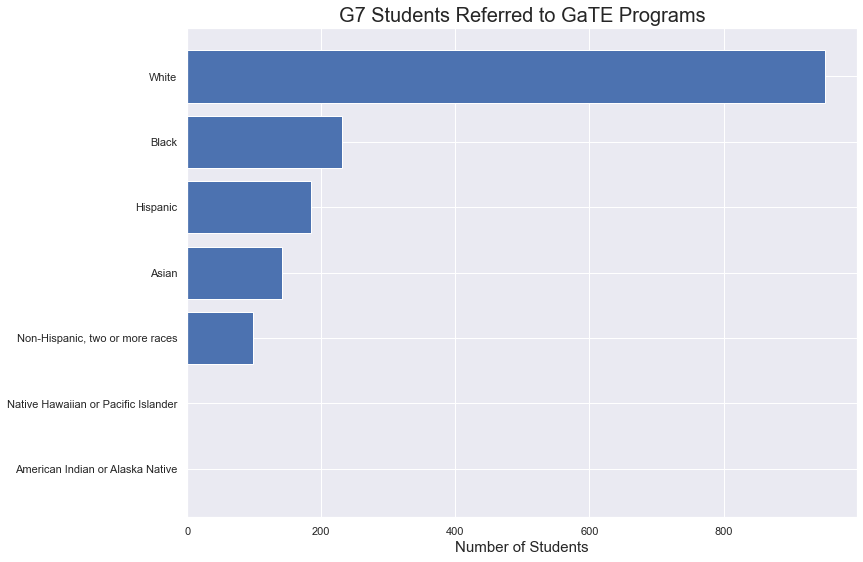

                                     Number  Proportion
Race                                                   
American Indian or Alaska Native        0.0        0.00
Native Hawaiian or Pacific Islander     0.0        0.00
Non-Hispanic, two or more races        98.0        0.06
Asian                                 142.0        0.09
Hispanic                              185.0        0.12
Black                                 231.0        0.14
White                                 951.0        0.59


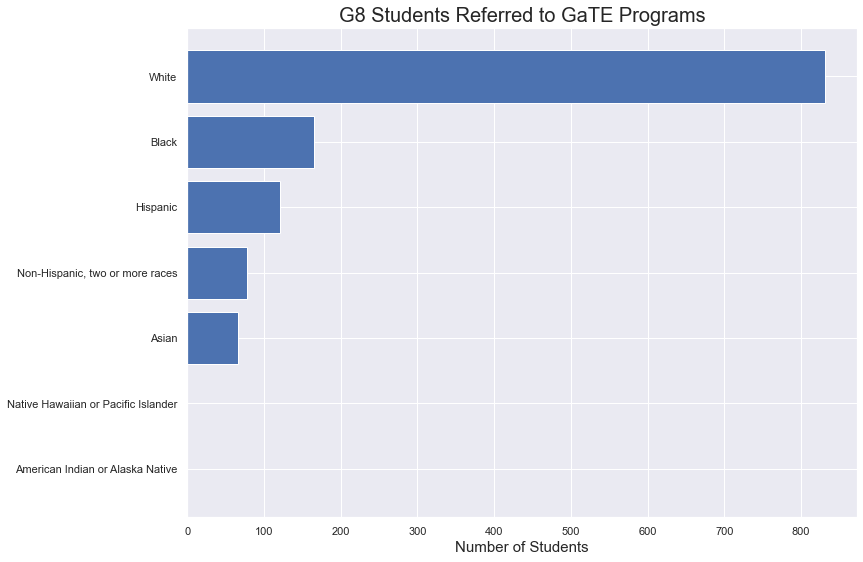

                                     Number  Proportion
Race                                                   
American Indian or Alaska Native        0.0        0.00
Native Hawaiian or Pacific Islander     0.0        0.00
Asian                                  66.0        0.05
Non-Hispanic, two or more races        78.0        0.06
Hispanic                              121.0        0.10
Black                                 165.0        0.13
White                                 831.0        0.66


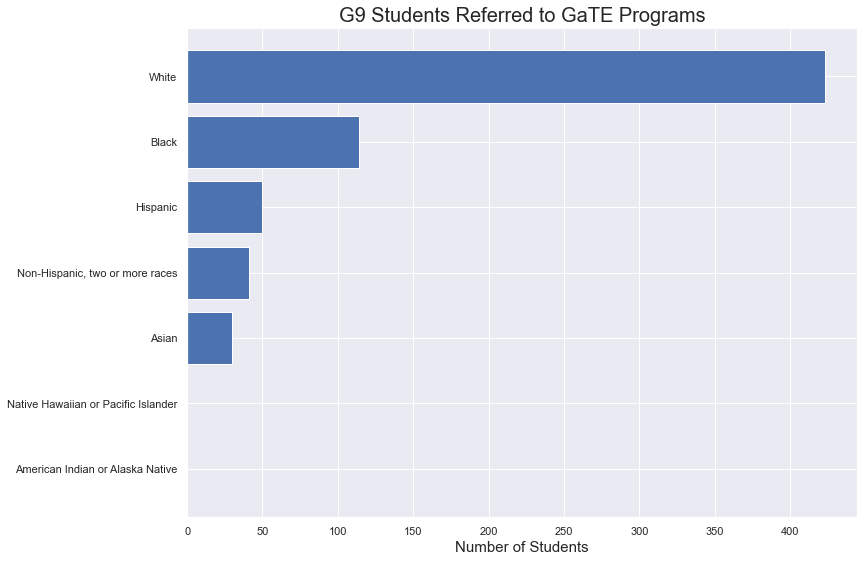

                                     Number  Proportion
Race                                                   
American Indian or Alaska Native        0.0        0.00
Native Hawaiian or Pacific Islander     0.0        0.00
Asian                                  30.0        0.05
Non-Hispanic, two or more races        41.0        0.06
Hispanic                               50.0        0.08
Black                                 114.0        0.17
White                                 423.0        0.64


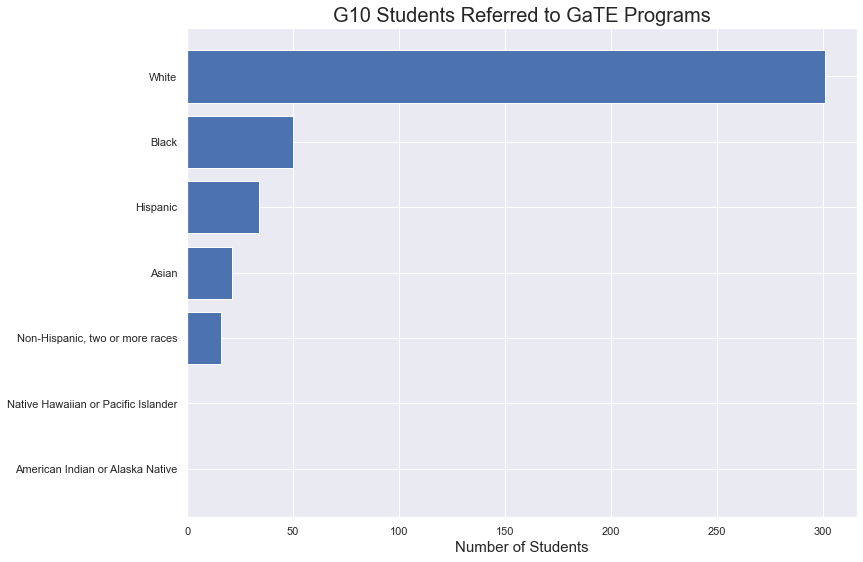

                                     Number  Proportion
Race                                                   
American Indian or Alaska Native        0.0        0.00
Native Hawaiian or Pacific Islander     0.0        0.00
Non-Hispanic, two or more races        16.0        0.04
Asian                                  21.0        0.05
Hispanic                               34.0        0.08
Black                                  50.0        0.12
White                                 301.0        0.71


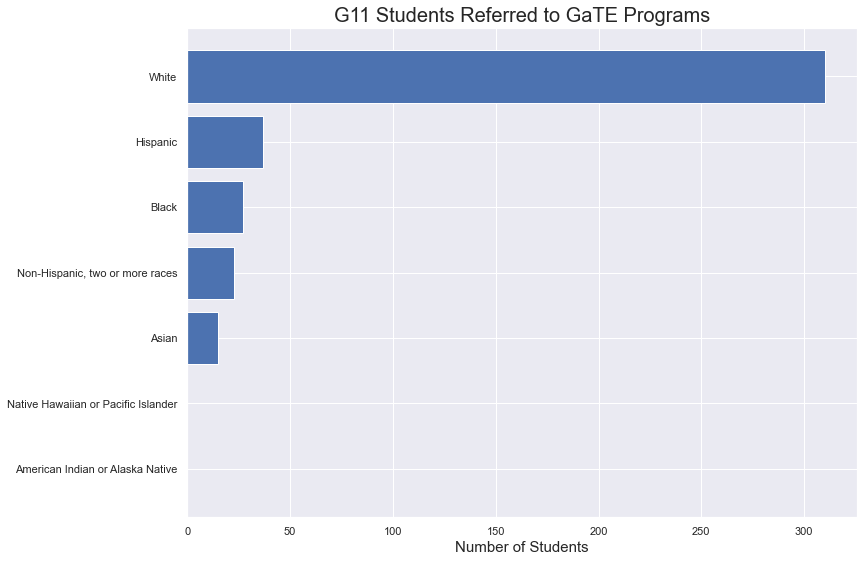

                                     Number  Proportion
Race                                                   
American Indian or Alaska Native        0.0        0.00
Native Hawaiian or Pacific Islander     0.0        0.00
Asian                                  15.0        0.04
Non-Hispanic, two or more races        23.0        0.06
Black                                  27.0        0.07
Hispanic                               37.0        0.09
White                                 310.0        0.75


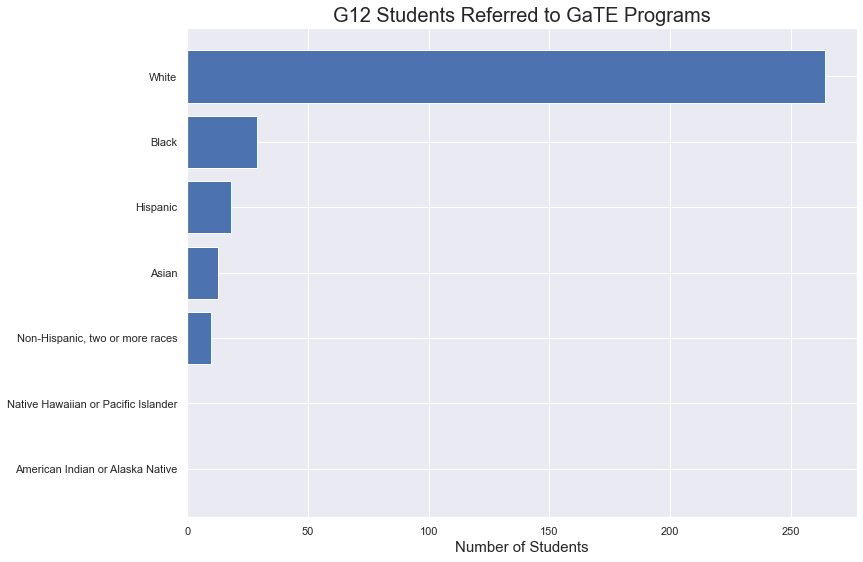

                                     Number  Proportion
Race                                                   
American Indian or Alaska Native        0.0        0.00
Native Hawaiian or Pacific Islander     0.0        0.00
Non-Hispanic, two or more races        10.0        0.03
Asian                                  13.0        0.04
Hispanic                               18.0        0.05
Black                                  29.0        0.09
White                                 264.0        0.79


In [7]:
# Plot racial breakdown for each grade level

for i in referred_students.index:
    plt.figure()
    test_df = referred_students.loc[i]
    proportions = [round(test_df.values[i]/test_df.values.sum(), 2) for i in range(0, len(test_df))]
    
    new_df = pd.DataFrame(list(zip(test_df.index, test_df.values, proportions)), columns = ['Race', 'Number', 'Proportion'])
    new_df = new_df.set_index('Race')
    new_df = new_df.sort_values(by=['Number'])
    
    plt.barh(new_df.index, new_df['Number'])
    
    
    plt.title(i + " Students Referred to GaTE Programs", fontsize =20);
    plt.xlabel('Number of Students', fontsize = 15);
    plt.show()
    print(new_df)
    

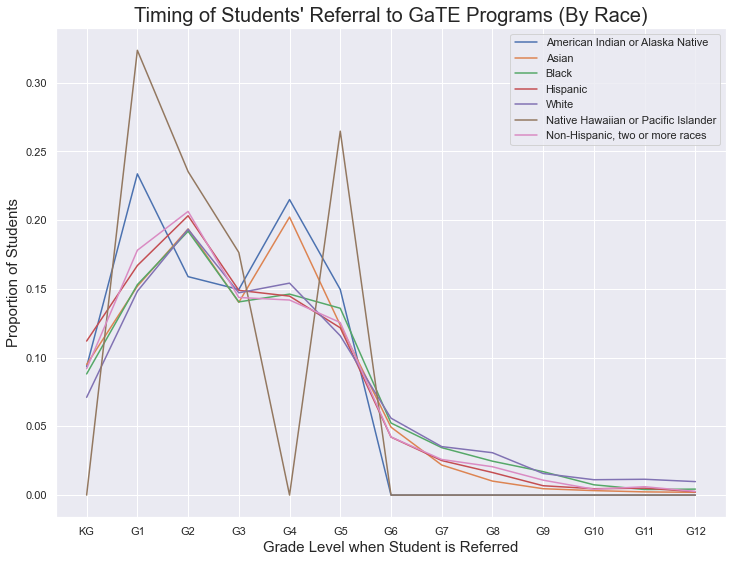

In [8]:
# Look at when students of a given race are referred to GaTE

referred_students_proportions = referred_students/referred_students.sum()

for i in referred_students_proportions:
    temp_df = referred_students_proportions[i]
    plt.plot(temp_df.index, temp_df.values)
    plt.legend(referred_students_proportions.columns)
    
plt.ylabel('Proportion of Students', fontsize =15);
plt.xlabel('Grade Level when Student is Referred', fontsize = 15);
plt.title('Timing of Students\' Referral to GaTE Programs (By Race)', fontsize = 20);

In [9]:
#Look at overall proportions of GaTE referrals by race

referred_students_proportions_overall = referred_students.apply(lambda x: x/x.sum(), axis=1)

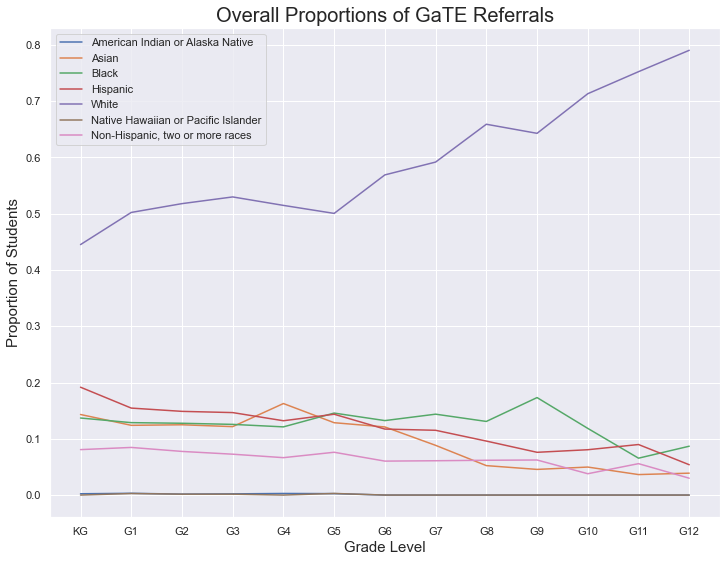

In [10]:
for i in referred_students_proportions_overall:
    temp_df = referred_students_proportions_overall[i]
    plt.plot(temp_df.index, temp_df.values)
    plt.legend(referred_students_proportions_overall.columns)
    
plt.ylabel('Proportion of Students', fontsize =15);
plt.xlabel('Grade Level', fontsize = 15);
plt.title('Overall Proportions of GaTE Referrals', fontsize = 20);

### Ethnicity of Identified (Chosen) Students by Grade 

In [11]:
identified_students = identified_students.fillna(0)
identified_students = identified_students.set_index('Grade')
identified_students

,American Indian or Alaska Native,Asian,Black,Hispanic,White,Native Hawaiian or Pacific Islander,"Non-Hispanic, two or more races"
Grade,,,,,,,
KG,0.0,13,35,30,111,0.0,21
G1,0.0,237,362,310,1603,11.0,271
G2,11.0,469,834,687,3256,14.0,466
G3,17.0,1742,1569,1483,6716,29.0,1024
G4,33.0,2368,1843,1810,8638,17.0,1213
G5,39.0,2686,2094,2050,9851,40.0,1328
G6,47.0,3005,2021,2025,10490,29.0,1343
G7,36.0,2703,2426,2007,10744,31.0,1305
G8,32.0,2792,2175,1799,10520,41.0,1177


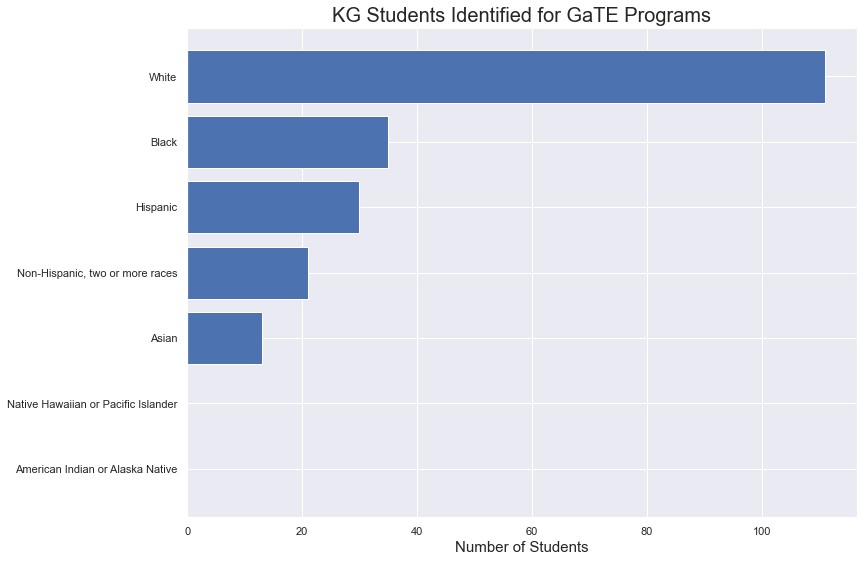

                                     Number  Proportion
Race                                                   
American Indian or Alaska Native        0.0        0.00
Native Hawaiian or Pacific Islander     0.0        0.00
Asian                                  13.0        0.06
Non-Hispanic, two or more races        21.0        0.10
Hispanic                               30.0        0.14
Black                                  35.0        0.17
White                                 111.0        0.53


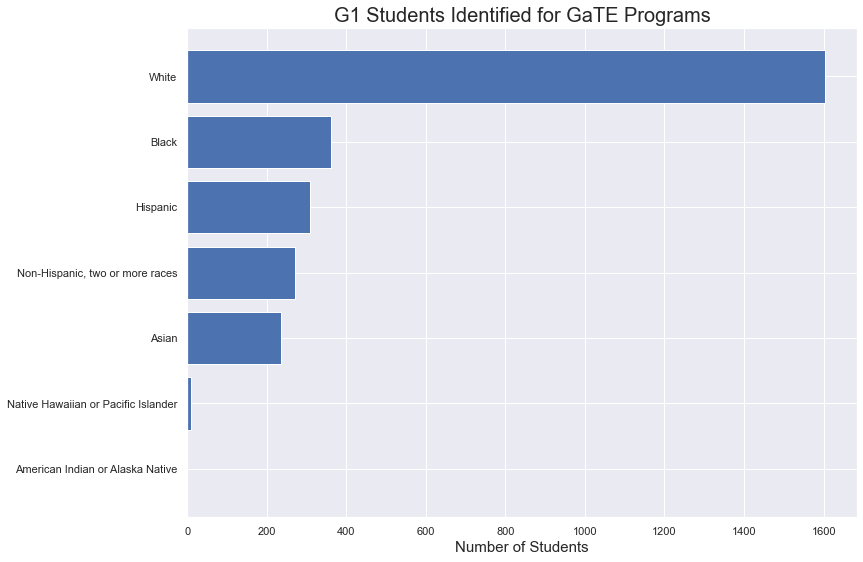

                                     Number  Proportion
Race                                                   
American Indian or Alaska Native        0.0        0.00
Native Hawaiian or Pacific Islander    11.0        0.00
Asian                                 237.0        0.08
Non-Hispanic, two or more races       271.0        0.10
Hispanic                              310.0        0.11
Black                                 362.0        0.13
White                                1603.0        0.57


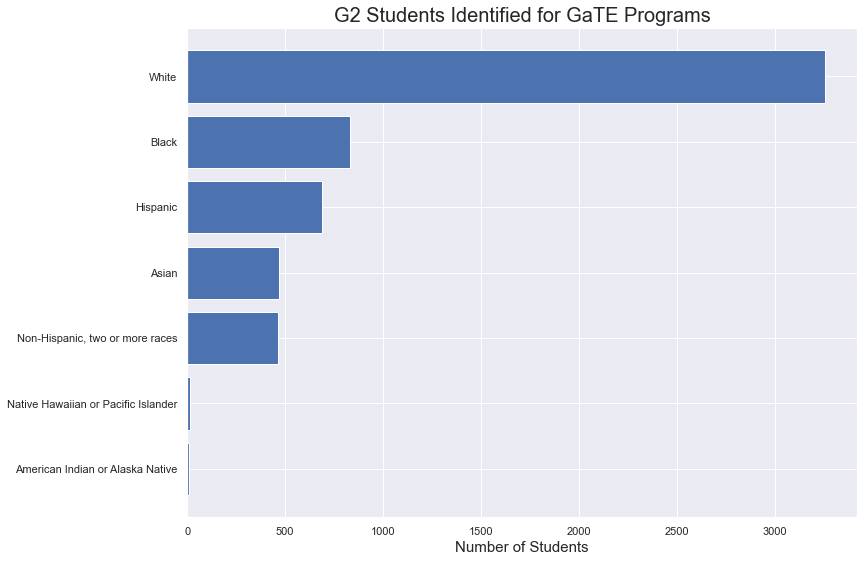

                                     Number  Proportion
Race                                                   
American Indian or Alaska Native       11.0        0.00
Native Hawaiian or Pacific Islander    14.0        0.00
Non-Hispanic, two or more races       466.0        0.08
Asian                                 469.0        0.08
Hispanic                              687.0        0.12
Black                                 834.0        0.15
White                                3256.0        0.57


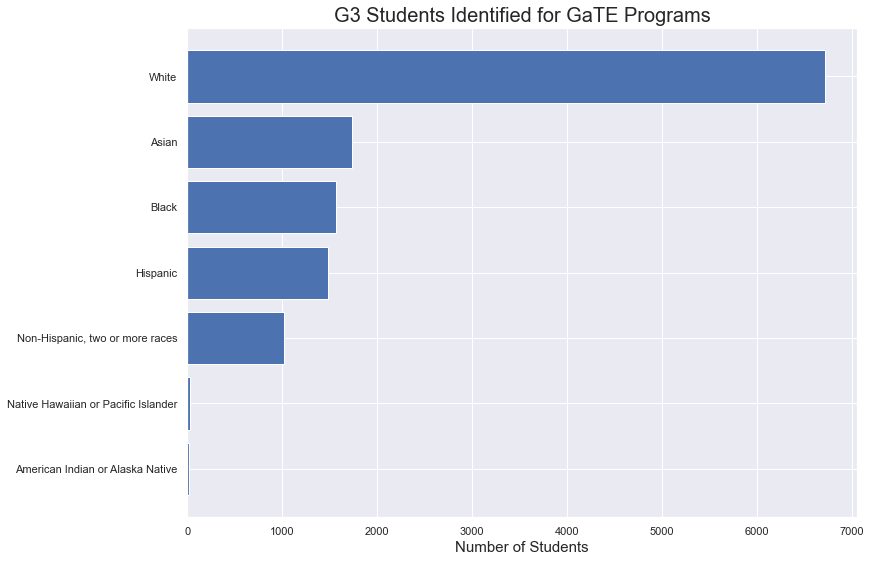

                                     Number  Proportion
Race                                                   
American Indian or Alaska Native       17.0        0.00
Native Hawaiian or Pacific Islander    29.0        0.00
Non-Hispanic, two or more races      1024.0        0.08
Hispanic                             1483.0        0.12
Black                                1569.0        0.12
Asian                                1742.0        0.14
White                                6716.0        0.53


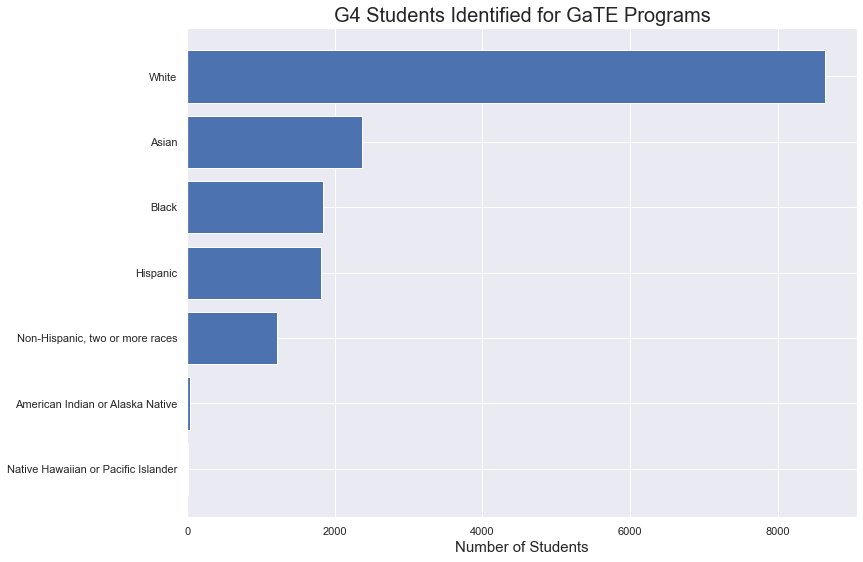

                                     Number  Proportion
Race                                                   
Native Hawaiian or Pacific Islander    17.0        0.00
American Indian or Alaska Native       33.0        0.00
Non-Hispanic, two or more races      1213.0        0.08
Hispanic                             1810.0        0.11
Black                                1843.0        0.12
Asian                                2368.0        0.15
White                                8638.0        0.54


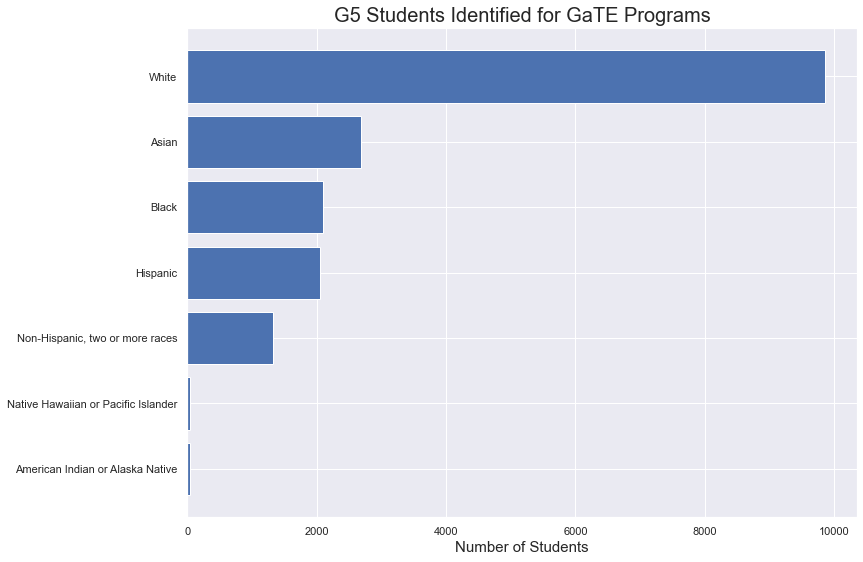

                                     Number  Proportion
Race                                                   
American Indian or Alaska Native       39.0        0.00
Native Hawaiian or Pacific Islander    40.0        0.00
Non-Hispanic, two or more races      1328.0        0.07
Hispanic                             2050.0        0.11
Black                                2094.0        0.12
Asian                                2686.0        0.15
White                                9851.0        0.54


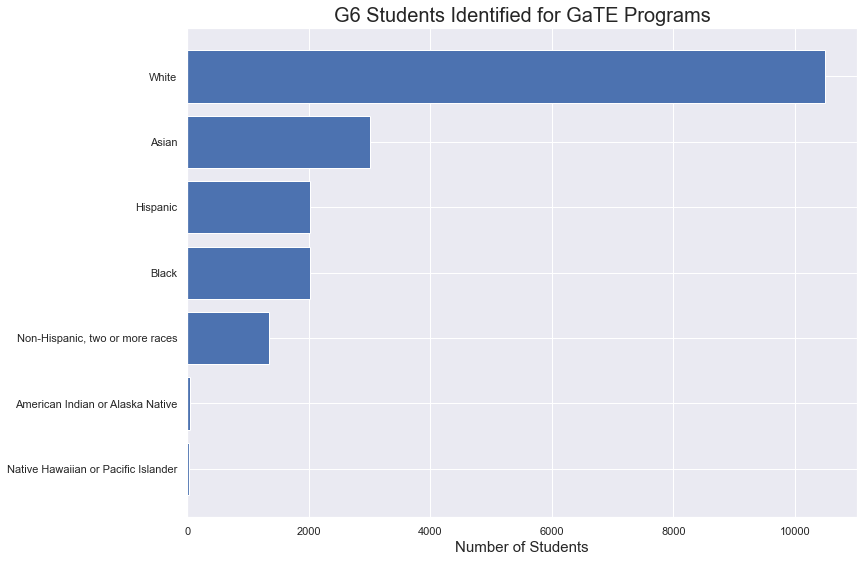

                                      Number  Proportion
Race                                                    
Native Hawaiian or Pacific Islander     29.0        0.00
American Indian or Alaska Native        47.0        0.00
Non-Hispanic, two or more races       1343.0        0.07
Black                                 2021.0        0.11
Hispanic                              2025.0        0.11
Asian                                 3005.0        0.16
White                                10490.0        0.55


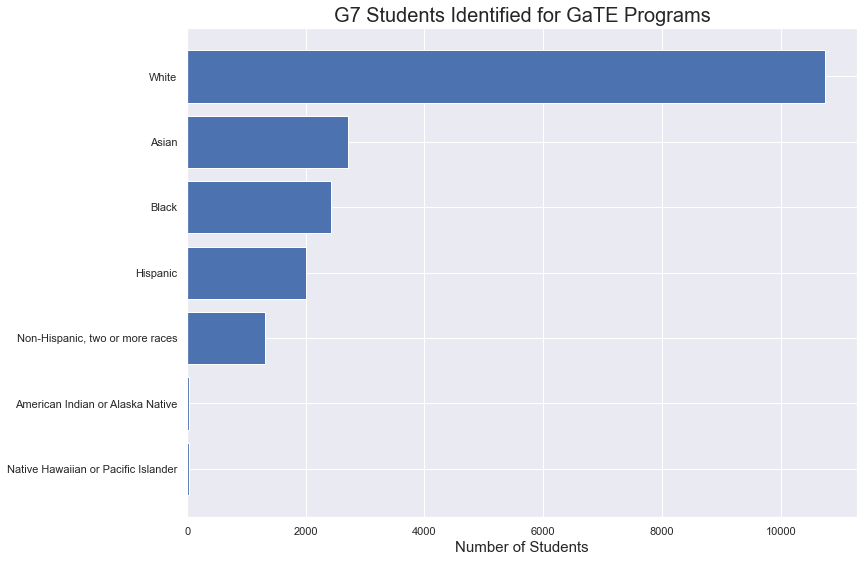

                                      Number  Proportion
Race                                                    
Native Hawaiian or Pacific Islander     31.0        0.00
American Indian or Alaska Native        36.0        0.00
Non-Hispanic, two or more races       1305.0        0.07
Hispanic                              2007.0        0.10
Black                                 2426.0        0.13
Asian                                 2703.0        0.14
White                                10744.0        0.56


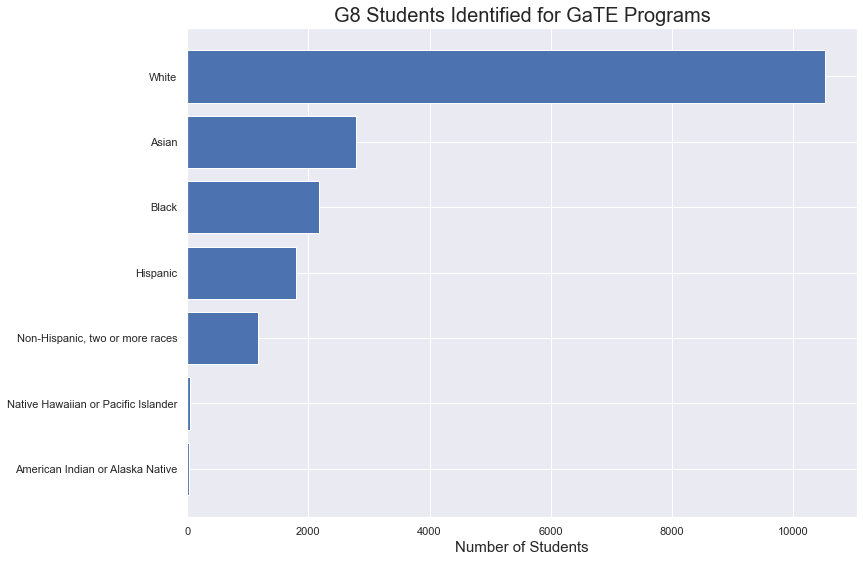

                                      Number  Proportion
Race                                                    
American Indian or Alaska Native        32.0        0.00
Native Hawaiian or Pacific Islander     41.0        0.00
Non-Hispanic, two or more races       1177.0        0.06
Hispanic                              1799.0        0.10
Black                                 2175.0        0.12
Asian                                 2792.0        0.15
White                                10520.0        0.57


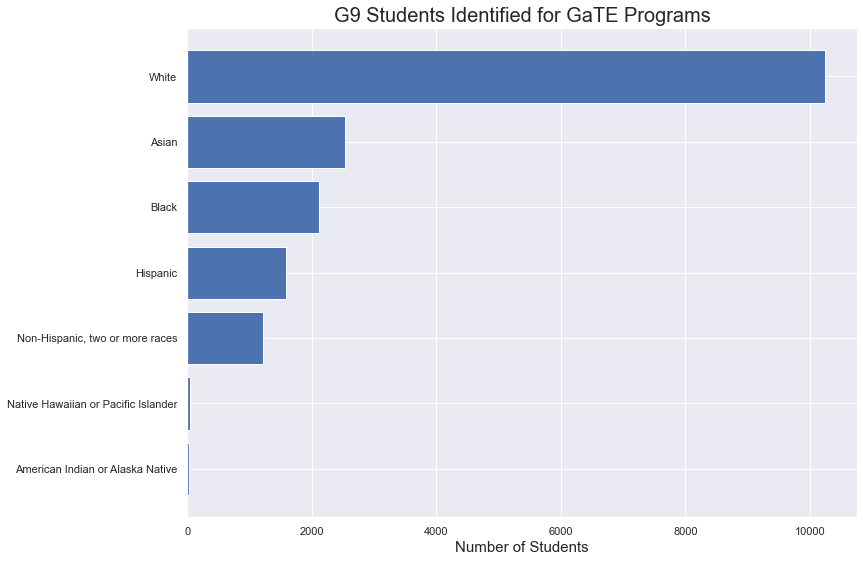

                                      Number  Proportion
Race                                                    
American Indian or Alaska Native        34.0        0.00
Native Hawaiian or Pacific Islander     44.0        0.00
Non-Hispanic, two or more races       1211.0        0.07
Hispanic                              1593.0        0.09
Black                                 2119.0        0.12
Asian                                 2527.0        0.14
White                                10236.0        0.58


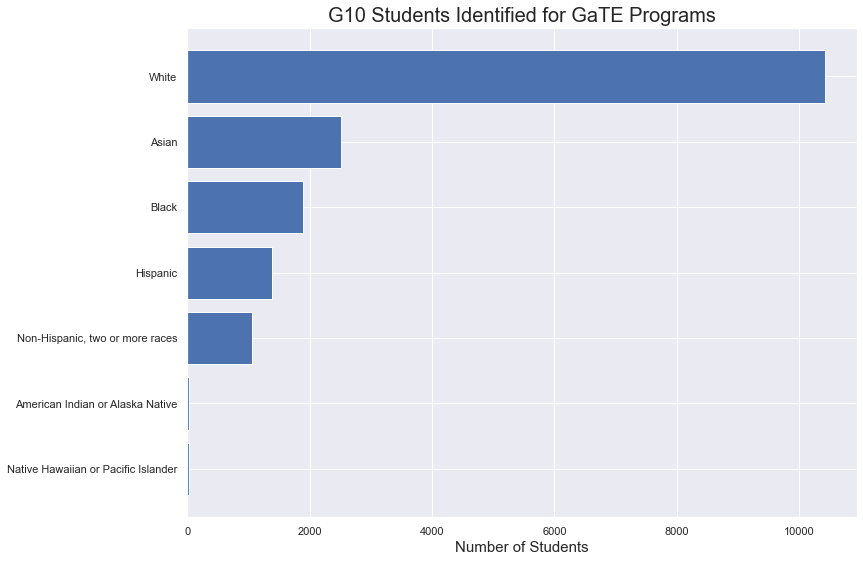

                                      Number  Proportion
Race                                                    
Native Hawaiian or Pacific Islander     26.0        0.00
American Indian or Alaska Native        32.0        0.00
Non-Hispanic, two or more races       1056.0        0.06
Hispanic                              1386.0        0.08
Black                                 1886.0        0.11
Asian                                 2509.0        0.14
White                                10414.0        0.60


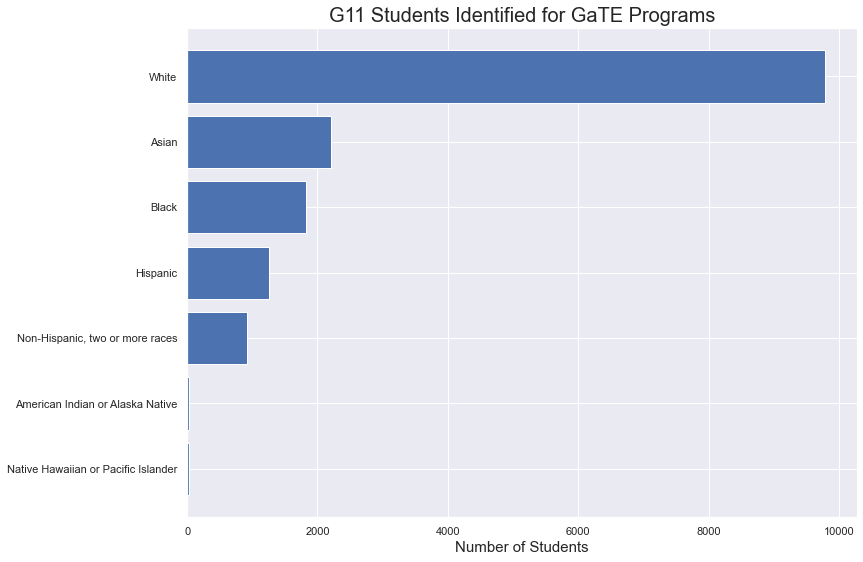

                                     Number  Proportion
Race                                                   
Native Hawaiian or Pacific Islander    28.0        0.00
American Indian or Alaska Native       36.0        0.00
Non-Hispanic, two or more races       923.0        0.06
Hispanic                             1260.0        0.08
Black                                1821.0        0.11
Asian                                2213.0        0.14
White                                9781.0        0.61


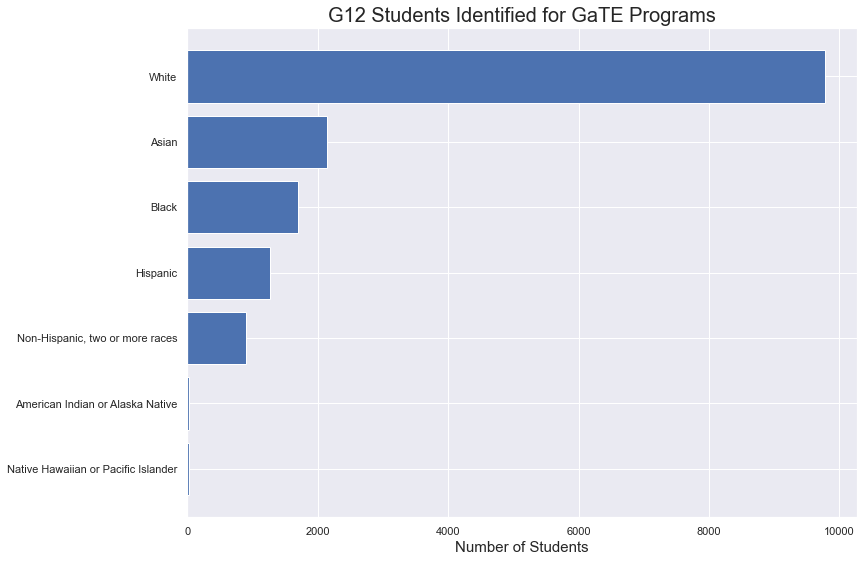

                                     Number  Proportion
Race                                                   
Native Hawaiian or Pacific Islander    25.0        0.00
American Indian or Alaska Native       26.0        0.00
Non-Hispanic, two or more races       906.0        0.06
Hispanic                             1276.0        0.08
Black                                1707.0        0.11
Asian                                2144.0        0.14
White                                9775.0        0.62


In [12]:
# Plot racial breakdown for each grade level

for i in identified_students.index:
    plt.figure()
    test_df = identified_students.loc[i]
    proportions = [round(test_df.values[i]/test_df.values.sum(), 2) for i in range(0, len(test_df))]
    
    new_df = pd.DataFrame(list(zip(test_df.index, test_df.values, proportions)), columns = ['Race', 'Number', 'Proportion'])
    new_df = new_df.set_index('Race')
    new_df = new_df.sort_values(by=['Number'])
    
    plt.barh(new_df.index, new_df['Number'])
    
    
    plt.title(i + " Students Identified for GaTE Programs", fontsize =20);
    plt.xlabel('Number of Students', fontsize = 15);
    plt.show()
    print(new_df)

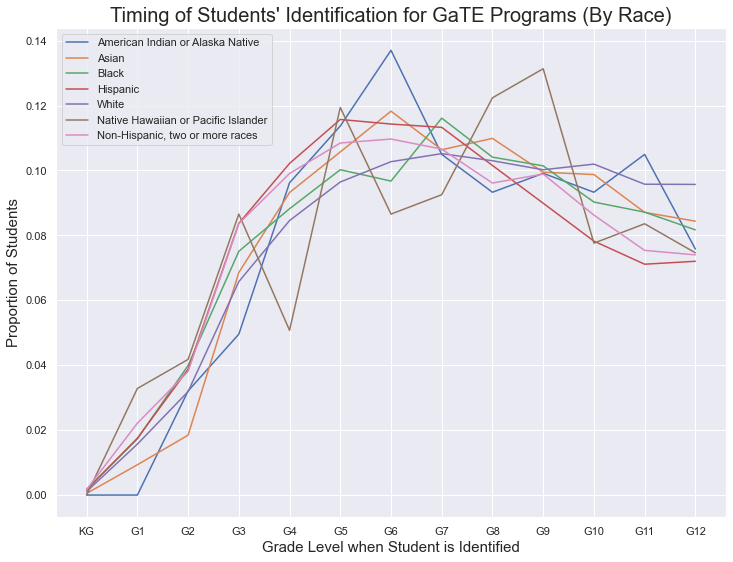

In [13]:
# Look at when students of a given race are identified for GaTE

identified_students_proportions = identified_students/identified_students.sum()

for i in identified_students_proportions:
    temp_df = identified_students_proportions[i]
    plt.plot(temp_df.index, temp_df.values)
    plt.legend(identified_students_proportions.columns)
    
plt.ylabel('Proportion of Students', fontsize =15);
plt.xlabel('Grade Level when Student is Identified', fontsize = 15);
plt.title('Timing of Students\' Identification for GaTE Programs (By Race)', fontsize = 20);

In [14]:
#Look at overall proportions of GaTE referrals by race

identified_students_proportions_overall = identified_students.apply(lambda x: x/x.sum(), axis=1)

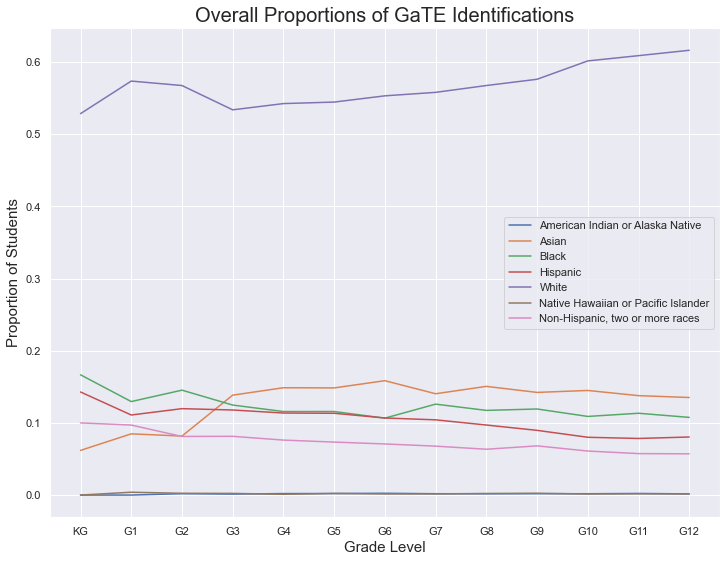

In [15]:
for i in identified_students_proportions_overall:
    temp_df = identified_students_proportions_overall[i]
    plt.plot(temp_df.index, temp_df.values)
    plt.legend(identified_students_proportions_overall.columns)
    
plt.ylabel('Proportion of Students', fontsize =15);
plt.xlabel('Grade Level', fontsize = 15);
plt.title('Overall Proportions of GaTE Identifications', fontsize = 20);

### Difference between referral and identification rates for GaTE Programs (by race)

##### If there was no racial discrimination in the admission process, we should expect referral and identification rates to be the same. Therefore, disparities between referral rate and identification (admission) rates may be a sign of discrimination in the admission process.

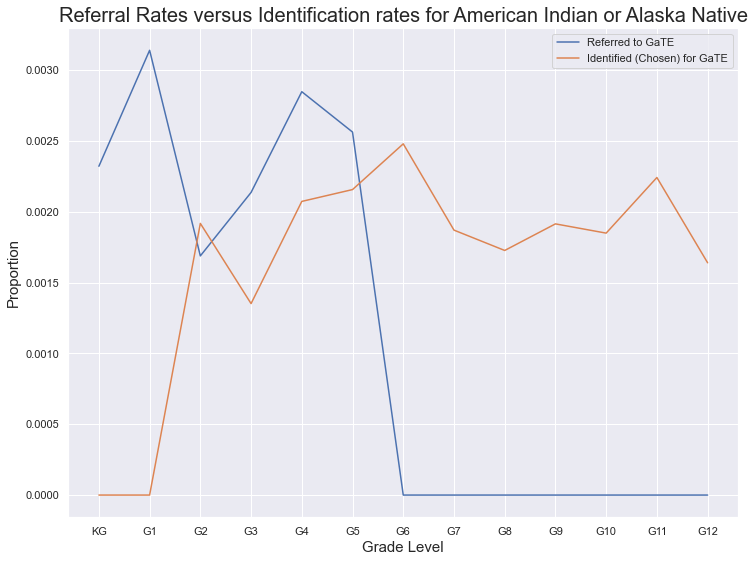

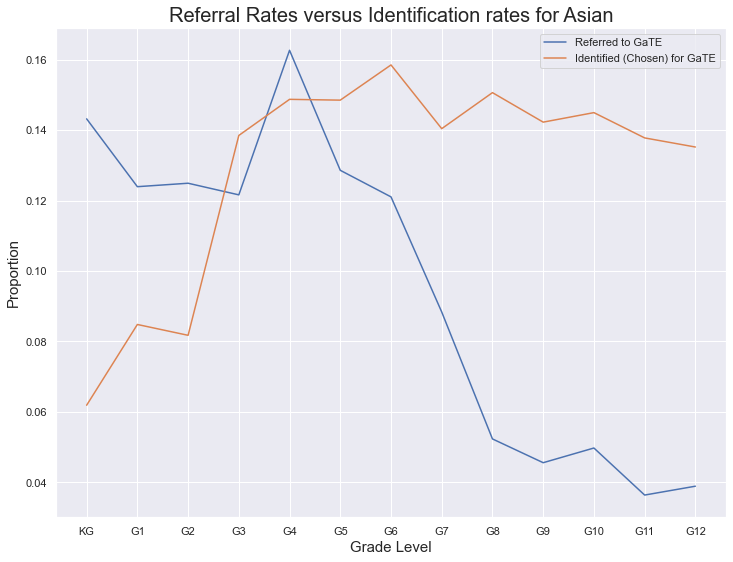

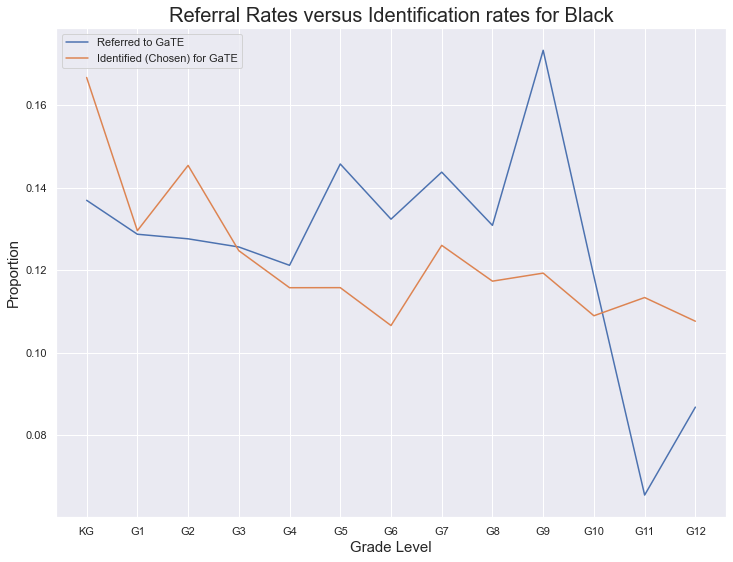

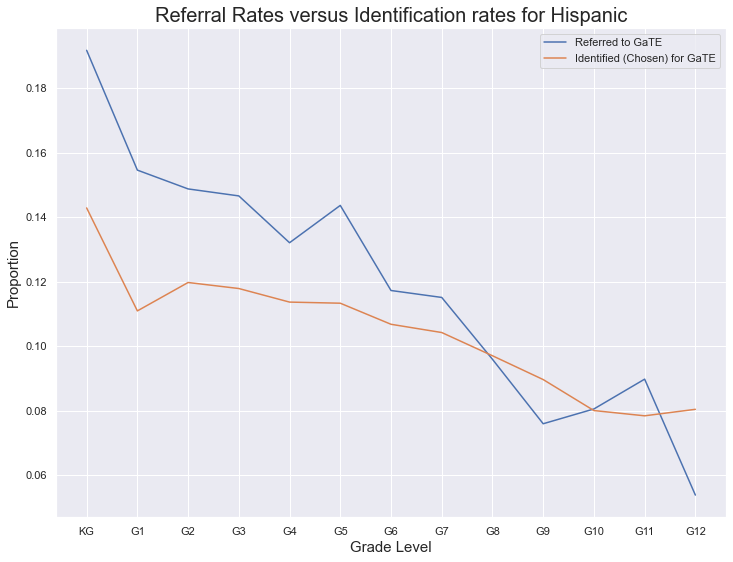

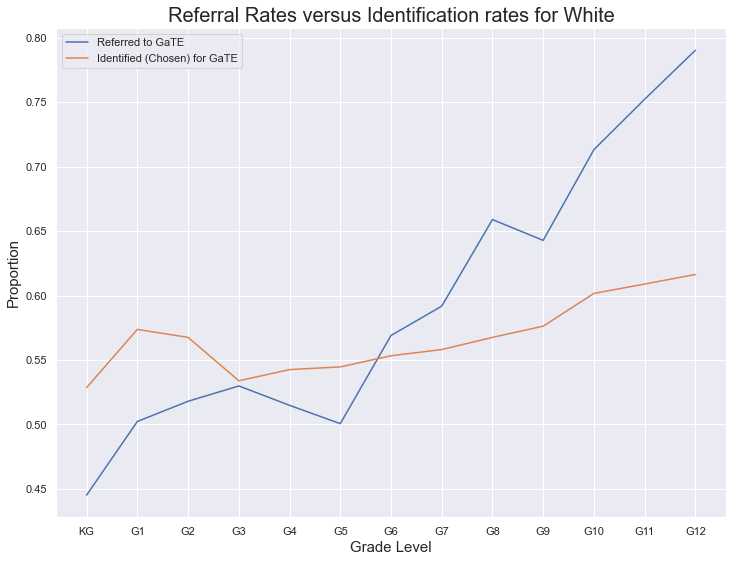

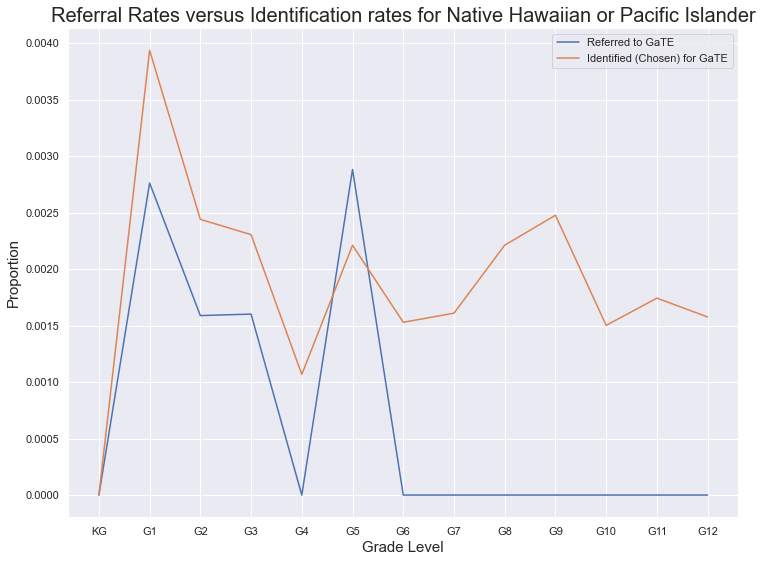

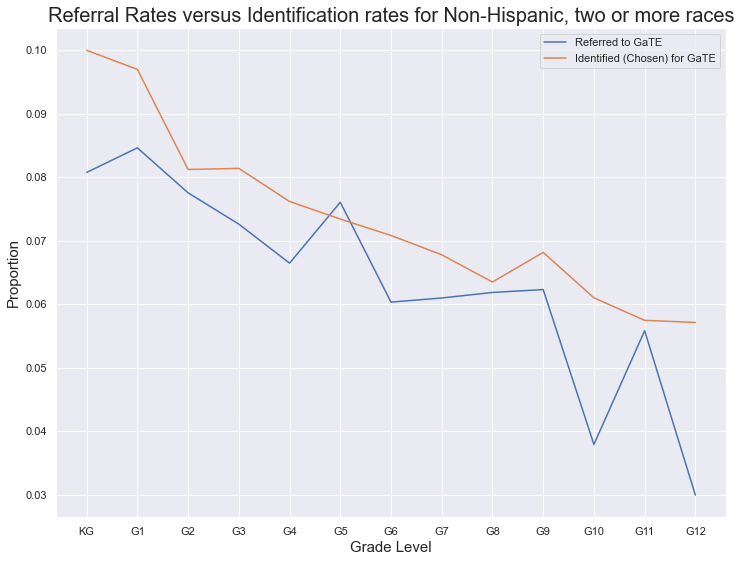

In [16]:
for i in referred_students_proportions_overall.columns:
    plt.figure()
    ref_test = referred_students_proportions_overall[i]
    id_test = identified_students_proportions_overall[i]
    
    plt.plot(ref_test.index, ref_test.values)
    plt.plot(id_test.index, id_test.values)
    
    plt.title('Referral Rates versus Identification rates for ' + i, fontsize =20);
    plt.xlabel('Grade Level', fontsize = 15);
    plt.ylabel('Proportion', fontsize = 15);
    plt.legend(['Referred to GaTE', 'Identified (Chosen) for GaTE'])
    
    plt.show()

### Gender of Identified Students by Grade

In [17]:
gender = gender.set_index('Grade')


In [18]:
gender

,MALE,FEMALE
Grade,,
KG,123,89
G1,1489,1309
G2,3056,2681
G3,6478,6102
G4,8240,7682
G5,9265,8823
G6,9443,9517
G7,9840,9412
G8,9212,9324


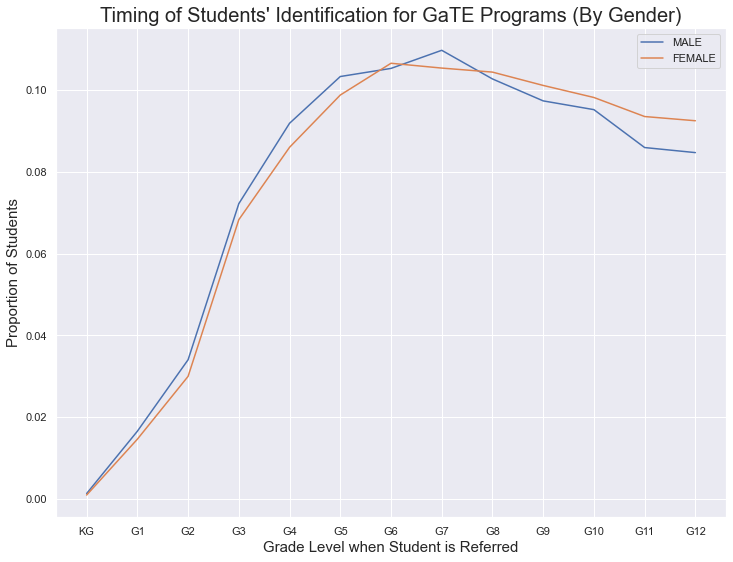

In [19]:
# Look at when students of a given gender are identified for GaTE

gender_proportions = gender/gender.sum()

for i in gender_proportions:
    temp_df = gender_proportions[i]
    plt.plot(temp_df.index, temp_df.values)
    plt.legend(gender_proportions.columns)
    
plt.ylabel('Proportion of Students', fontsize =15);
plt.xlabel('Grade Level when Student is Referred', fontsize = 15);
plt.title('Timing of Students\' Identification for GaTE Programs (By Gender)', fontsize = 20);

In [20]:
#Look at overall proportions of GaTE referrals by gender

gender_proportions_overall = gender.apply(lambda x: x/x.sum(), axis=1)

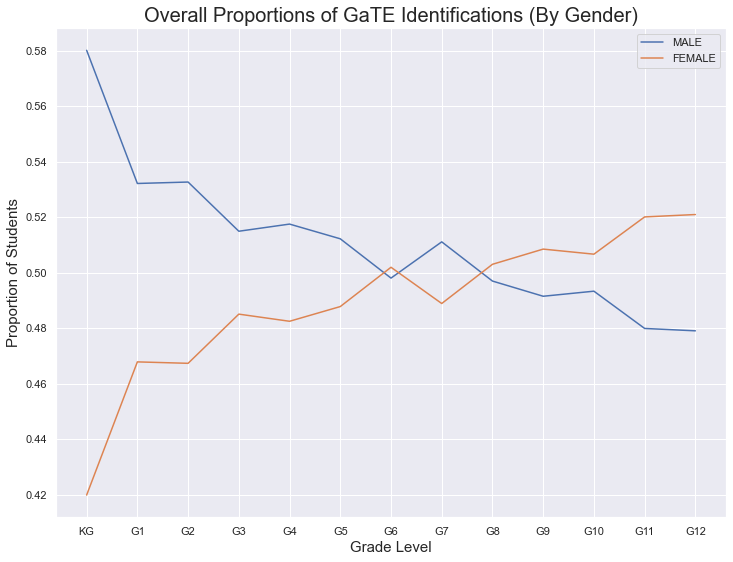

In [21]:
for i in gender_proportions_overall:
    temp_df = gender_proportions_overall[i]
    plt.plot(temp_df.index, temp_df.values)
    plt.legend(gender_proportions_overall.columns)
    
plt.ylabel('Proportion of Students', fontsize =15);
plt.xlabel('Grade Level', fontsize = 15);
plt.title('Overall Proportions of GaTE Identifications (By Gender)', fontsize = 20);

### Giftedness By Grade

In [22]:
giftedness_by_grade = giftedness_by_grade.set_index('Grade')

In [23]:
giftedness_by_grade

,Visual/Performing Arts,General Intellectual Aptitude,Specific Academic Aptitude,Career and Technical Aptitude
Grade,,,,
KG,NaN,165,47,NaN
G1,NaN,2065,740,NaN
G2,53.0,3986,1751,NaN
G3,171.0,9400,3111,NaN
G4,489.0,11339,4422,NaN
G5,817.0,12569,5159,NaN
G6,1030.0,13147,5336,NaN
G7,994.0,13348,5431,NaN
G8,1055.0,12762,5283,NaN


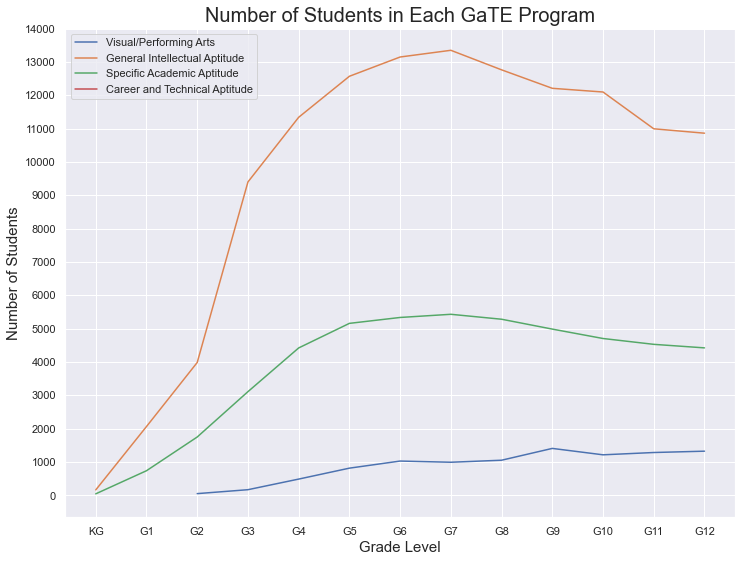

In [24]:
for i in giftedness_by_grade:
    temp_df = giftedness_by_grade[i]
    plt.plot(temp_df.index, temp_df.values)
    plt.legend(giftedness_by_grade.columns)
    
plt.yticks(np.arange(0, 15000, step=1000))   
plt.ylabel('Number of Students', fontsize =15);
plt.xlabel('Grade Level', fontsize = 15);
plt.title('Number of Students in Each GaTE Program', fontsize = 20);

### Responsibilities of GaTE Administrators

In [25]:
responsibilities_admin

,Responsibilities of GaTE Administrator,Quantity
0,oversees only programs related to gifted educa...,26
1,"in addition to gifted education programs, over...",91
